#   Citation networks of high energy physics group

In [ ]:
# NS_project_citation_network_bp1
import networkx as nx
import tqdm as tqdm

## PreProcessing and making of Graph

In [ ]:
# http://networkrepository.com/proximity.php
# f = open("/content/drive/MyDrive/NSProjectDataset/citationData/CA-HepPh.txt", "r")
f = open("/content/drive/MyDrive/NSProjectDataset/citationData/Cit-HepPh1_large.txt", "r")
# tag1
# f = open("C:\\Users\\abhishek\\Desktop\\iiitdabhi\\4rthSem\\NS\\ash1\\directed\\email-Eu-core.txt", "r")
edges=f.read().split("\n")
node1_List=[]
node2_List=[]

for ed in edges:
#     print(ed,ed.split())
#     break
#     print(eds)
    eds=ed.split()
    if(len(eds)!=0):
        n1=int(eds[0])
        n2=int(eds[1])
#     print(eds,eds[0],eds[1])
#     break
        node1_List.append(n1)
        node2_List.append(n2)
G=nx.Graph()

for edge in range(len(node1_List)):
    node1=node1_List[edge]
    node2=node2_List[edge]
    G.add_edge(node1,node2)
Degree_count_from={}
Degree_count_to={}
Degree_from={}
Degree_to={}
node1_List_set=set(node1_List)
node2_List_set=set(node2_List)

for x in node1_List_set:
  # if(x not in Degree_count_from):
      Degree_from[x]=G.degree(x)
  # else:
  #   print("hi")
  #   break

for y in node2_List_set:
  # if(x not in Degree_count_to):
      Degree_to[y]=G.degree(y)
  # else:
  #   print("hello")
  #   break


In [ ]:
# print(max(node1_List),max(node2_List))
# print(min(node1_List),min(node2_List))
# number_of_nodes=max((max(node1_List),max(node2_List)))

## Degree Distibution of Users and Interation Points

### Degree Distibution of Users Nodes (citers)

No handles with labels found to put in legend.


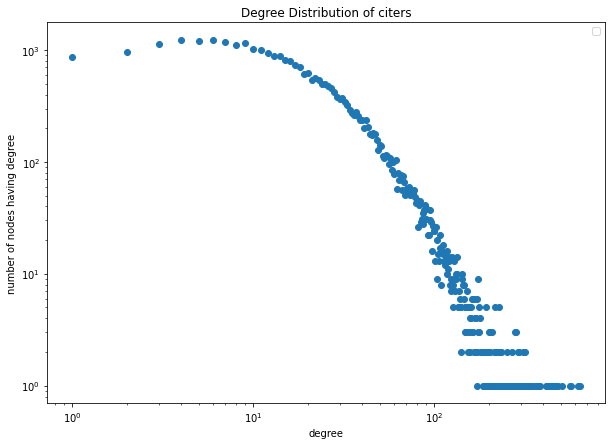

In [ ]:
list_of_degrees=list(Degree_from.values())
from_degree_counts={}
for deg in list_of_degrees:
    if(deg in from_degree_counts):
        from_degree_counts[deg]+=1
    else:
        from_degree_counts[deg]=1
max_from_degree_freq=max(from_degree_counts.values())


from_degree_counts1=from_degree_counts.copy()

from_distis=dict((sorted(from_degree_counts1.items())))
from_max_degree_count=max(from_distis.values())
# total_nodes=sum(distis.values())
# from_distis.update((x, round(y/from_max_degree_count,2)) for x, y in from_distis.items())
# x_axis=list(from_distis.keys())[1:len(from_distis.keys())]
# y_axis=list(from_distis.values())[1:len(from_distis.values())]

x_axis=list(from_distis.keys())
y_axis=list(from_distis.values())

import matplotlib.pyplot as plt 
import matplotlib
plt.loglog(x_axis, y_axis,"o") 
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel('degree') 

plt.ylabel('number of nodes having degree') 
 
plt.title('Degree Distribution of citers') 
plt.legend() 
# plt.show() 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)

### Degree Distibution of Interaction Points Nodes (citees)

No handles with labels found to put in legend.


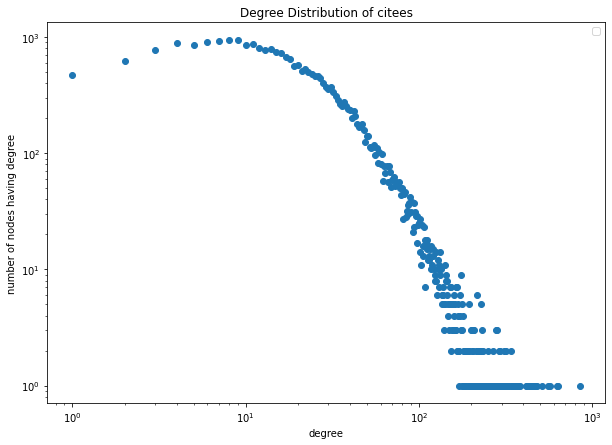

In [ ]:
list_of_degrees=list(Degree_to.values())
to_degree_counts={}
for deg in list_of_degrees:
    if(deg in to_degree_counts):
        to_degree_counts[deg]+=1
    else:
        to_degree_counts[deg]=1
max_to_degree_freq=max(to_degree_counts.values())


to_degree_counts1=to_degree_counts.copy()

to_distis=dict((sorted(to_degree_counts1.items())))
to_max_degree_count=max(to_distis.values())
# total_nodes=sum(distis.values())
# to_distis.update((x, round(y/to_max_degree_count,2)) for x, y in to_distis.items())
# x_axis=list(to_distis.keys())[1:len(to_distis.keys())]
# y_axis=list(to_distis.values())[1:len(to_distis.values())]

x_axis1=list(to_distis.keys())
y_axis1=list(to_distis.values())

import matplotlib.pyplot as plt 
import matplotlib
# plt.scatter(x_axis1, y_axis1, label = "fraction") 
plt.loglog(x_axis1, y_axis1,"o" ) 
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel('degree') 

plt.ylabel('number of nodes having degree') 
 
plt.title('Degree Distribution of citees') 
plt.legend() 
# plt.show() 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)

## Robustness

In [ ]:
G1=G.copy()
nodes_in_Graph=list(G1.nodes())
size_of_lrgest_cnctd_cmpnt=[]
percent_of_remaining_nodes=[]
orignal_graph_no_of_nodes=len(nodes_in_Graph)
# for x in tqdm.tqdm(nodes_in_Graph):
i=0
while (i < orignal_graph_no_of_nodes): 
  largest_cc = max(nx.connected_components(G1), key=len)
  percent_of_rnodes=round(len(G1.nodes())/orignal_graph_no_of_nodes,5)
  size_of_lrgest_cnctd_cmpnt.append(len(largest_cc))
  percent_of_remaining_nodes.append(percent_of_rnodes)
  # print(len(largest_cc),percent_of_rnodes)
  # G1.remove_node(x)
  G1.remove_nodes_from(nodes_in_Graph[i:i+10])
  i+=10

  # print(len(G1.nodes()))


No handles with labels found to put in legend.


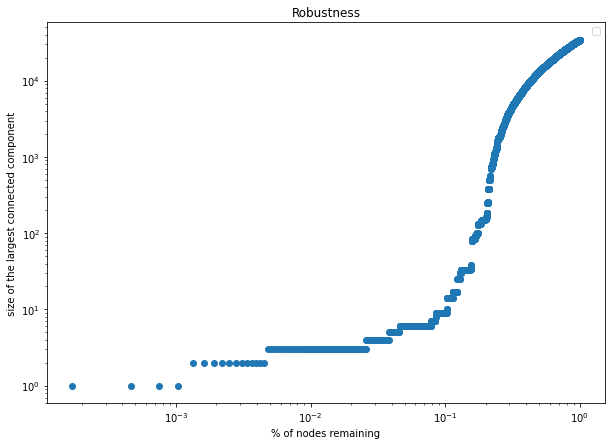

In [ ]:


x_axis=percent_of_remaining_nodes
y_axis=size_of_lrgest_cnctd_cmpnt

import matplotlib.pyplot as plt 
import matplotlib
# plt.scatter(x_axis, y_axis, label = "fraction") 
plt.loglog(x_axis, y_axis,"o") 
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel('% of nodes remaining') 

plt.ylabel(' size of the largest connected component ') 
 
plt.title('Robustness') 
plt.legend() 
# plt.show() 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)

In [ ]:
##

##  Bipartite Clustering Coefficient

In [ ]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

In [ ]:
concted_nodes=list(G0.nodes())

In [ ]:
BPG_node1_List=[x  for x in node1_List if x in concted_nodes]
BPG_node2_List=[x for x in node2_List if x in concted_nodes]

In [ ]:
BPG_edge_List=list(G0.edges())

In [ ]:
BPG=nx.Graph()
BPG.add_nodes_from(BPG_node1_List, bipartite=0)
BPG.add_nodes_from(BPG_node2_List, bipartite=1)
BPG.add_edges_from(BPG_edge_List)


In [ ]:
BPG1_orignal_graph_no_of_nodes=len(G.nodes())
BPG1_orignal_graph_no_of_nodes

34546

In [ ]:
BPG1=BPG.copy()
BPG1_nodes_in_Graph=list(BPG1.nodes())
BPG1_avg_bpt_cc=[]
BPG1_percent_of_remaining_nodes=[]
BPG1_orignal_graph_no_of_nodes=len(BPG1_nodes_in_Graph)
print(BPG1_orignal_graph_no_of_nodes)
i=0
while (i < BPG1_orignal_graph_no_of_nodes): 
  bpt_cc=nx.average_clustering(BPG1)
  
  BPG1_percent_of_rnodes=round(len(BPG1.nodes())/BPG1_orignal_graph_no_of_nodes,5)
  BPG1_avg_bpt_cc.append(bpt_cc)
  BPG1_percent_of_remaining_nodes.append(BPG1_percent_of_rnodes)
  # print(len(largest_cc),percent_of_rnodes)
  BPG1.remove_nodes_from(BPG1_nodes_in_Graph[i:i+10])
  i += 10

34401


In [ ]:
len(BPG1_percent_of_remaining_nodes)

3441

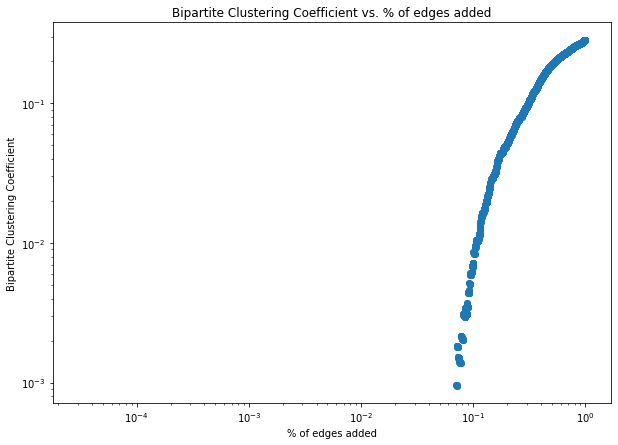

In [ ]:
# from networkx.algorithms import bipartite
# # Gz = nx.star_graph(3)  # star graphs are bipartite
# bipartite.average_clustering(BPG)


x_axis=BPG1_percent_of_remaining_nodes
y_axis=BPG1_avg_bpt_cc

import matplotlib.pyplot as plt 
import matplotlib
plt.scatter(x_axis, y_axis, label = "fraction") 
plt.loglog(x_axis, y_axis,"o") 
# plt.xscale("log")
# plt.yscale("log")

plt.xlabel('% of edges added') 

plt.ylabel('Bipartite Clustering Coefficient') 
 
plt.title('Bipartite Clustering Coefficient vs. % of edges added') 
# plt.legend() 
# plt.show() 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)

## Rewired  Clustring coefficient Citation

In [ ]:
BPG_num_edges=len(BPG_node2_List)

In [ ]:
from random import randrange
Gr=BPG.copy()   
for i in range(BPG_num_edges):
    rndnum=randrange(BPG_num_edges)
    if(rndnum!=i and BPG_node1_List[i]!=BPG_node2_List[rndnum] and Gr.has_edge(BPG_node1_List[i],BPG_node2_List[i])):
      Gr.remove_edge(BPG_node1_List[i],BPG_node2_List[i])
      Gr.add_edge(BPG_node1_List[i],BPG_node2_List[rndnum])


In [ ]:
BPG1=Gr.copy()
BPG1_nodes_in_Graph=list(BPG1.nodes())
BPG1_avg_bpt_cc=[]
BPG1_percent_of_remaining_nodes=[]
BPG1_orignal_graph_no_of_nodes=len(BPG1_nodes_in_Graph)
print(BPG1_orignal_graph_no_of_nodes)
i=0
pbar = tqdm.tqdm(total=BPG1_orignal_graph_no_of_nodes)
while (i < BPG1_orignal_graph_no_of_nodes): 
  bpt_cc=nx.average_clustering(BPG1)
  
  BPG1_percent_of_rnodes=round(len(BPG1.nodes())/BPG1_orignal_graph_no_of_nodes,5)
  BPG1_avg_bpt_cc.append(bpt_cc)
  BPG1_percent_of_remaining_nodes.append(BPG1_percent_of_rnodes)
  # print(len(largest_cc),percent_of_rnodes)
  BPG1.remove_nodes_from(BPG1_nodes_in_Graph[i:i+250])
  pbar.update(250)
  i += 250





  0%|          | 0/34401 [00:00<?, ?it/s]

34401






  1%|          | 250/34401 [00:14<32:10, 17.69it/s]



  1%|▏         | 500/34401 [00:27<31:25, 17.98it/s]



  1%|▏         | 500/34401 [00:38<31:25, 17.98it/s]



  2%|▏         | 750/34401 [00:39<29:59, 18.70it/s]



  3%|▎         | 1000/34401 [00:50<28:18, 19.66it/s]



  4%|▎         | 1250/34401 [01:01<26:27, 20.89it/s]



  4%|▍         | 1500/34401 [01:10<24:43, 22.17it/s]



  5%|▌         | 1750/34401 [01:19<22:58, 23.68it/s]



  6%|▌         | 2000/34401 [01:27<21:15, 25.41it/s]



  7%|▋         | 2250/34401 [01:35<19:38, 27.27it/s]



  7%|▋         | 2500/34401 [01:42<18:14, 29.13it/s]



  8%|▊         | 2750/34401 [01:49<16:51, 31.28it/s]



  9%|▊         | 3000/34401 [01:55<15:36, 33.54it/s]



  9%|▉         | 3250/34401 [02:01<14:27, 35.90it/s]



 10%|█         | 3500/34401 [02:06<13:29, 38.20it/s]



 11%|█         | 3750/34401 [02:11<12:34, 40.64it/s]



 12%|█▏        | 4000/34401 [02:17<11:46, 43.04it/s]



 12%|█▏        | 4250/34401 [02:21<11:00, 45.65i

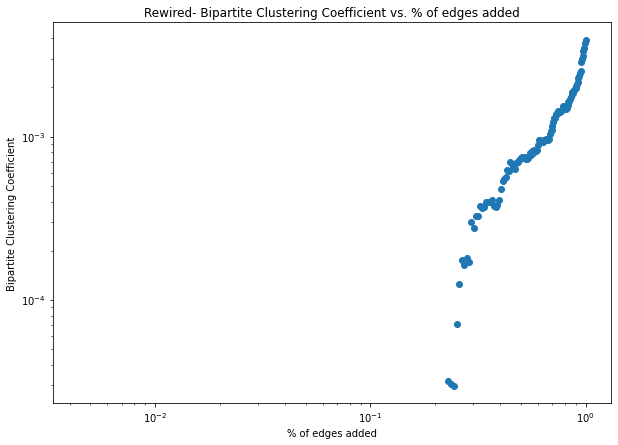

In [ ]:
# from networkx.algorithms import bipartite
# # Gz = nx.star_graph(3)  # star graphs are bipartite
# bipartite.average_clustering(BPG)


x_axis=BPG1_percent_of_remaining_nodes
y_axis=BPG1_avg_bpt_cc

import matplotlib.pyplot as plt 
import matplotlib
# plt.scatter(x_axis, y_axis, label = "fraction") 
plt.loglog(x_axis, y_axis,"o") 
# plt.xscale("log")
# plt.yscale("log")

plt.xlabel('% of edges added') 

plt.ylabel('Bipartite Clustering Coefficient') 
 
plt.title('Rewired- Bipartite Clustering Coefficient vs. % of edges added') 
# plt.legend() 
# # plt.show() 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)

In [ ]:
Gcc1 = sorted(nx.connected_components(G), key=len, reverse=True)
G01 = G.subgraph(Gcc1[0])


In [ ]:
print("average clustering coefficient of citation graph",nx.average_clustering(G01))

average clustering coefficient of citation graph 0.28559442591408446


In [ ]:
print("Diameter of citation graph",nx.average_clustering(G01))

Diameter of citation graph 0.28559442591408446
